In [1]:
# !pip install pytorch-transformers

In [2]:
import torch
from pytorch_transformers import GPT2Tokenizer
from pytorch_transformers import GPT2LMHeadModel

In [3]:
INPUT_TEXT = "We work on a vaccine that would solve the problem of"

In [4]:
%%time
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model     = GPT2LMHeadModel.from_pretrained('gpt2')
model.eval()
print("Done")

Done
CPU times: user 2.77 s, sys: 949 ms, total: 3.72 s
Wall time: 6.76 s


In [5]:
indexed_tokens = tokenizer.encode(INPUT_TEXT)
tokens_tensor = torch.tensor([indexed_tokens])

#### No back propagation, as we use pretrained model, so we use torch.no_grad to save memory by not constructing the compute graph during this forward pass. 

In [6]:
with torch.no_grad():
    last_hidden_states = model(tokens_tensor)
    result_tensor = last_hidden_states[0][0, -1, :]

<img src="image.png"  />

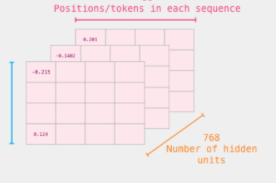

### Decode result tensor

In [8]:
print("Top result:")
print(tokenizer.decode(indexed_tokens + [torch.argmax(result_tensor).item()]))

Top result:
 We work on a vaccine that would solve the problem of autism


In [9]:
print("Top 20 options:")
t = sorted(list(result_tensor), reverse=True)[20]
print('\n'.join(list(tokenizer.decode([i]) for i,r in enumerate(result_tensor) if r.item() >= t) ))

Top 20 options:
 a
 the
 what
 how
 low
 global
 childhood
 HIV
 vaccine
 Ebola
 autism
 immunity
 vaccines
 AIDS
 vaccination
 infectious
 influenza
 measles
 HPV
 cervical
 polio
